[View in Colaboratory](https://colab.research.google.com/github/snehi04/Machine-Learning-Using-Python/blob/master/Logistic_Regression_Implementation.ipynb)

In [0]:
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot
from matplotlib import pyplot
from matplotlib import pylab
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [0]:
#Loading Dataset
data = datasets.load_iris()

In [4]:
data

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [5]:
print(data.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [0]:
#Dataframe Creation
iris_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [7]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [0]:
#Shuffling the object of list
iris_df=shuffle(pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target']),random_state = 1)

In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


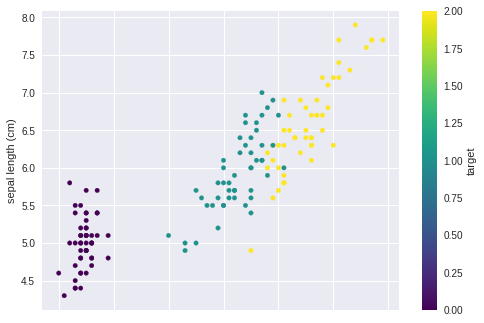

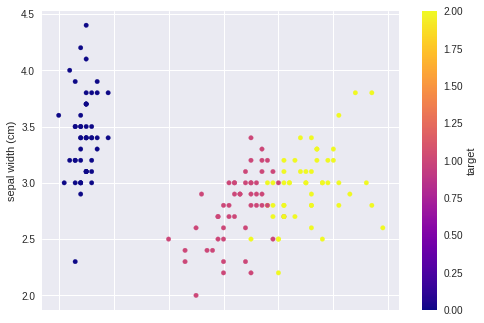

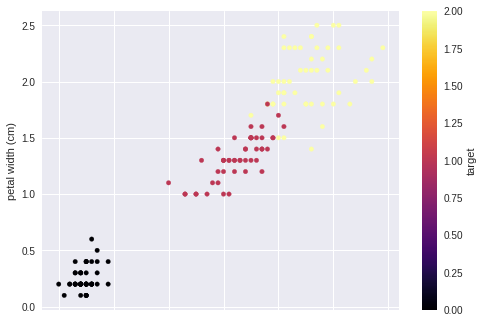

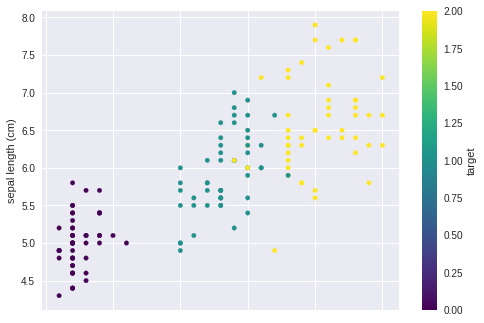

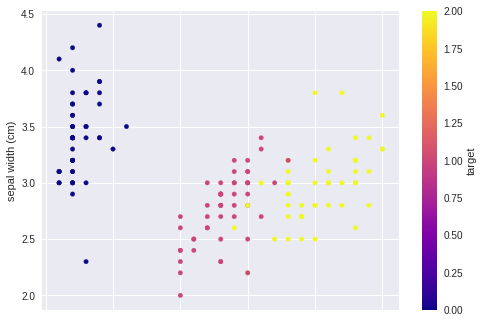

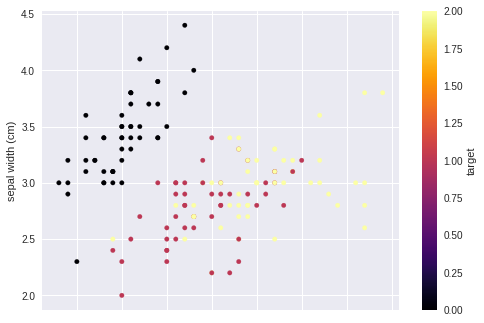

In [11]:
#Scatter plot for graphical analysis of the data
iris_df.plot.scatter(x='petal length (cm)',y='sepal length (cm)',c='target', cmap = 'viridis')
iris_df.plot.scatter(x='petal length (cm)',y='sepal width (cm)',c='target', cmap = 'plasma')
iris_df.plot.scatter(x='petal length (cm)',y='petal width (cm)',c='target', cmap = 'inferno')
iris_df.plot.scatter(x='petal width (cm)',y='sepal length (cm)',c='target', cmap = 'viridis')
iris_df.plot.scatter(x='petal width (cm)',y='sepal width (cm)',c='target', cmap = 'plasma')
iris_df.plot.scatter(x='sepal length (cm)',y='sepal width (cm)',c='target', cmap = 'inferno')


We can analyse from the scatter plot how the data points are seperated and the relation between feature exist.

In [0]:
# Make the data sets, train/test/validate
train_df = iris_df.iloc[0:100]
test_df = iris_df.iloc[101:125]
val_df = iris_df.iloc[126:150]

In [13]:
#Implementing Logistic Regression
lr = LogisticRegression()
lr.fit(train_df.drop('target', axis=1),train_df['target'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
#print(sum(lr.predict(train_df.drop('target', axis=1))==train_df['target']))
print(sum(lr.predict(test_df.drop('target', axis=1))==test_df['target']))

23


In [0]:
#Creating new feature
iris_df['petal area (cm)'] = iris_df['petal length (cm)'] * iris_df['petal width (cm)']

In [0]:
iris_df

In [0]:
train_df = iris_df.iloc[0:100]
test_df = iris_df.iloc[101:125]
val_df = iris_df.iloc[126:150]

In [18]:
#Implementing Logistic Regression again
lr = LogisticRegression()
lr.fit(train_df.drop('target', axis=1),train_df['target'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [19]:
print(sum(lr.predict(train_df.drop('target', axis=1))==train_df['target']))
print(sum(lr.predict(test_df.drop('target', axis=1))==test_df['target']))


98
23


In [0]:
print(sum(lr.predict(val_df.drop('target', axis=1))==val_df['target']))


In [0]:
confusion_matrix(test_df['target'],lr.predict(test_df))

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris_df['target'],lr.predict(test_df['target']))

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(iris_df['target'],lr.predict(val_df['target']))